## B. RAVI TEJA

# Prediction using Unsupervised ML

### Task:1  Predicting the percentage of marks of a student based on the number of study hours 

### Q: What will be the predicted score if a student studies for 9.25 hours/day?

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


### Reading Data

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Data Preprocessing

In [4]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
data.shape

(25, 2)

In [6]:
print(data.isnull().sum())
print('There are no Null values')

Hours     0
Scores    0
dtype: int64
There are no Null values


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


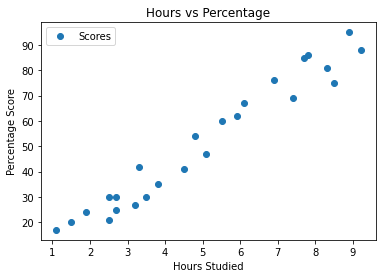

In [8]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Model

In [10]:
train = np.array(data[['Hours']])
test = np.array(data[['Scores']])


In [11]:
x_train,x_test,y_train,y_test=train_test_split(train, test, test_size=0.2, random_state=0)
print(f"The size of train data and test data is{x_train.size,y_train.size,x_train.size,y_test.size}")

The size of train data and test data is(20, 20, 20, 5)


In [12]:
reg = LinearRegression()

In [13]:
reg.fit(x_train,y_train)

LinearRegression()

In [14]:
pred=reg.predict(x_test)

In [15]:
m=reg.coef_
print("The value of m in the equation is:", m[0][0])

The value of m in the equation is: 9.910656480642237


In [16]:
c=reg.intercept_
print("The value of m in the equation is:",c[0])

The value of m in the equation is: 2.018160041434683


### Plotting the Model

In [17]:
line=reg.coef_*train+reg.intercept_
print(line)

[[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


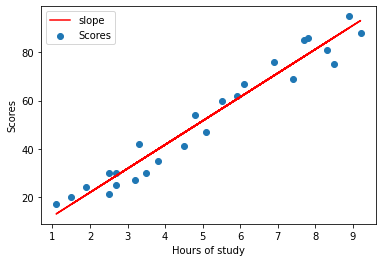

In [18]:
plt.scatter(train,test,label='Scores')
plt.plot(train,line,color='red',label='slope')
plt.xlabel('Hours of study')
plt.ylabel('Scores')
plt.legend()
plt.show()

### Checkinng the accuracy of our model

In [19]:
print('The accuracy of the model is:',reg.score(x_test,y_test))
mae=mean_absolute_error(y_test,pred)
print('the mean absolute error of the model is:',mae)

The accuracy of the model is: 0.9454906892105356
the mean absolute error of the model is: 4.183859899002975


### Testing of the model

### What will be the predicted score if a student studies for 9.25 hours/day?

In [20]:
hours=np.array(9.25)
pred2=reg.predict([[hours]])
print('If a student studies for',hours,"hours/day, the predicted marks will be:",pred2[0][0])

If a student studies for 9.25 hours/day, the predicted marks will be: 93.69173248737538
